Saving Synthetic_Mall_Customers.csv to Synthetic_Mall_Customers.csv

📂 File uploaded: Synthetic_Mall_Customers.csv

✅ Data loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                 113                      69
1           2  Female   56                  74                       4
2           3    Male   49                 111                      16
3           4    Male   21                 130                      24
4           5    Male   47                  77                      80

Selected features:
   Annual Income (k$)  Spending Score (1-100)
0                 113                      69
1                  74                       4
2                 111                      16
3                 130                      24
4                  77                      80

✨ Features scaled successfully!

========== ELBOW METHOD ==========


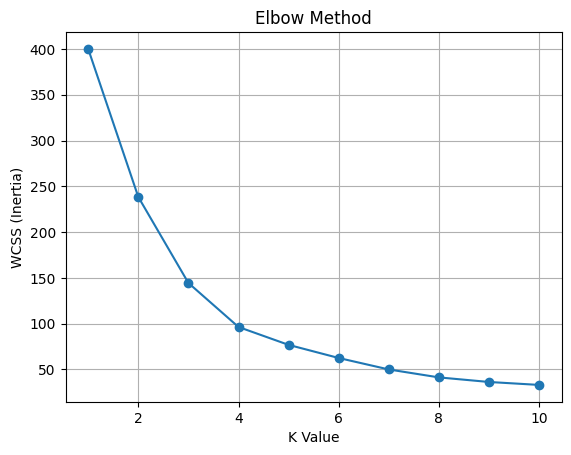


========== SILHOUETTE ANALYSIS ==========
K = 2, Silhouette Score = 0.3716
K = 3, Silhouette Score = 0.4038
K = 4, Silhouette Score = 0.4228
K = 5, Silhouette Score = 0.4064
K = 6, Silhouette Score = 0.4057
K = 7, Silhouette Score = 0.4280
K = 8, Silhouette Score = 0.4309
K = 9, Silhouette Score = 0.4221
K = 10, Silhouette Score = 0.4080


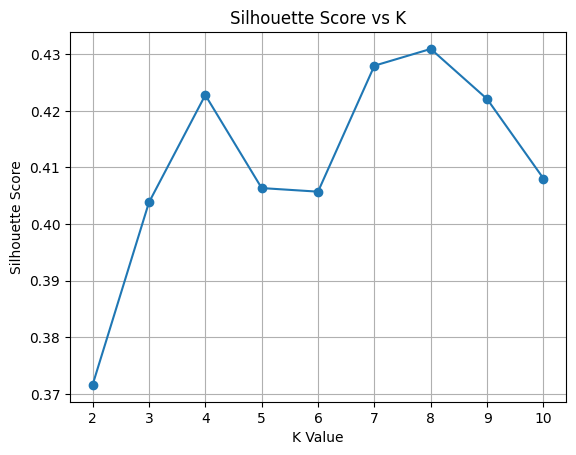


🎯 K-Means clustering done!

Sample with clusters:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   49                 113                      69   
1           2  Female   56                  74                       4   
2           3    Male   49                 111                      16   
3           4    Male   21                 130                      24   
4           5    Male   47                  77                      80   

   Cluster  
0        4  
1        0  
2        3  
3        3  
4        1  

💾 File saved: Customers_with_clusters.csv


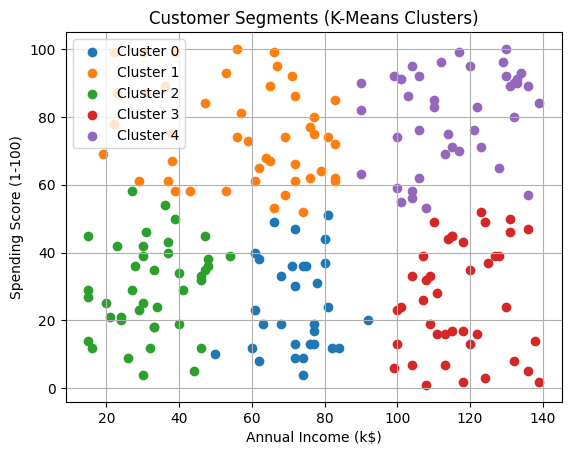

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# =========================================================
# 1️⃣ FILE UPLOAD + LOAD DATA (No path needed)
# =========================================================
def load_data():
    from google.colab import files
    uploaded = files.upload()  # User uploads ANY CSV file
    filename = list(uploaded.keys())[0]

    print(f"\n📂 File uploaded: {filename}\n")
    df = pd.read_csv(filename)

    print("✅ Data loaded successfully!")
    print(df.head())
    return df


# =========================================================
# 2️⃣ PREPROCESSING
# =========================================================
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    features = df[["Annual Income (k$)", "Spending Score (1-100)"]].copy()
    print("\nSelected features:")
    print(features.head())
    return features


# =========================================================
# 3️⃣ SCALING
# =========================================================
def scale_features(X: pd.DataFrame) -> np.ndarray:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("\n✨ Features scaled successfully!")
    return X_scaled


# =========================================================
# 4️⃣ ELBOW METHOD
# =========================================================
def elbow_method(X_scaled: np.ndarray):
    inertia_values = []

    for k in range(1, 11):
        kmeans = KMeans(
            n_clusters=k,
            init="k-means++",
            n_init=10,
            max_iter=300,
            random_state=42
        )
        kmeans.fit(X_scaled)
        inertia_values.append(kmeans.inertia_)

    plt.figure()
    plt.plot(range(1, 11), inertia_values, marker="o")
    plt.title("Elbow Method")
    plt.xlabel("K Value")
    plt.ylabel("WCSS (Inertia)")
    plt.grid(True)
    plt.show()


# =========================================================
# 5️⃣ SILHOUETTE SCORE ANALYSIS
# =========================================================
def silhouette_analysis(X_scaled: np.ndarray):
    sil_scores = []

    for k in range(2, 11):
        kmeans = KMeans(
            n_clusters=k,
            init="k-means++",
            n_init=10,
            max_iter=300,
            random_state=42
        )
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        sil_scores.append(score)
        print(f"K = {k}, Silhouette Score = {score:.4f}")

    plt.figure()
    plt.plot(range(2, 11), sil_scores, marker="o")
    plt.title("Silhouette Score vs K")
    plt.xlabel("K Value")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()


# =========================================================
# 6️⃣ APPLY K-MEANS
# =========================================================
def apply_kmeans(X_scaled: np.ndarray, n_clusters: int = 5):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init="k-means++",
        n_init=10,
        max_iter=300,
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)
    print("\n🎯 K-Means clustering done!")
    return labels, kmeans


# =========================================================
# 7️⃣ VISUALIZE CLUSTERS
# =========================================================
def visualize_clusters(X: pd.DataFrame, labels: np.ndarray):
    X_plot = X.copy()
    X_plot["Cluster"] = labels

    plt.figure()
    for cluster_id in sorted(X_plot["Cluster"].unique()):
        cluster_points = X_plot[X_plot["Cluster"] == cluster_id]
        plt.scatter(
            cluster_points["Annual Income (k$)"],
            cluster_points["Spending Score (1-100)"],
            label=f"Cluster {cluster_id}"
        )

    plt.title("Customer Segments (K-Means Clusters)")
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.legend()
    plt.grid(True)
    plt.show()


# =========================================================
# 8️⃣ MAIN FUNCTION
# =========================================================
def main():
    df = load_data()  # upload + load CSV

    X = preprocess_data(df)
    X_scaled = scale_features(X)

    print("\n========== ELBOW METHOD ==========")
    elbow_method(X_scaled)

    print("\n========== SILHOUETTE ANALYSIS ==========")
    silhouette_analysis(X_scaled)

    optimal_k = 5  # You can change manually from plots

    labels, kmeans = apply_kmeans(X_scaled, optimal_k)

    df["Cluster"] = labels
    print("\nSample with clusters:")
    print(df.head())

    df.to_csv("Customers_with_clusters.csv", index=False)
    print("\n💾 File saved: Customers_with_clusters.csv")

    visualize_clusters(X, labels)


# =========================================================
# RUN PROGRAM
# =========================================================
if __name__ == "__main__":
    main()


In [6]:
df= pd.read_csv("/Synthetic_Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,113,69
1,2,Female,56,74,4
2,3,Male,49,111,16
3,4,Male,21,130,24
4,5,Male,47,77,80
...,...,...,...,...,...
195,196,Female,54,136,57
196,197,Female,41,33,18
197,198,Female,46,72,47
198,199,Male,63,110,49
